In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import linalg as la
import sys
import matplotlib.pyplot as plt
import seaborn as sas

In [60]:
data_folder = Path("dataset/experiment-i/S1/")

file_name = data_folder / "1.txt"
df = pd.read_csv(file_name, sep="\t", header=None)
#la stessa posizione viene misurata 82 volte DC
#la prima non conta un cazzo(è vuota), anche l'ultima colonna è vuota dc
#dobbiamo fare la PCA tra le 82 misurazioni diverse boia
#e poi cercare di tenere quella più carina dc
df.drop(columns=[2048], inplace = True) #tolgo colonna
df.drop(0, inplace = True) #tolgo riga
df.drop(1, inplace = True) #tolgo riga

df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
2,0,0,0,0,1,0,6,4,6,2,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,5,4,5,2,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,6,4,5,1,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,5,4,4,1,...,3,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,5,4,4,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,0,0,0,0,0,3,0,3,0,...,3,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,3,0,2,0,...,1,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,1,0,2,0,...,2,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,1,0,3,0,...,2,0,0,0,0,0,0,0,0,0


In [69]:
array = df.to_numpy()
avg = array.mean()
array = array - avg

CX = np.cov(array)
w,v = la.eig(CX) 

CY =  np.diag(np.round(np.real(w),2))
print("Trace of the original data matrix: " , np.round(CX.trace(),2))
print("Trace of the data matrix after the changes of base: ", np.round(CY.trace(),2), "\n")

v.shape

tr = 0;
for i in range(0,len(CY)):
    tr = tr + CY[i,i]
    print("Fraction of the total variability keeping only the first principal component: ", np.round(100*tr/CY.trace()),"%")



P = v[:,0:1]
print(P.shape)
P = abs(P)

array_final = P.T.dot(array)
#print(P)



Trace of the original data matrix:  410356.43
Trace of the data matrix after the changes of base:  410356.44 

Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the tot

In [70]:
array_final[0] = array_final[0] + avg
array_final[0][array_final[0] < 0] = 0
array_final[0][array_final[0] > 7000] = 0

file = open("prova1.txt", "w") 

for i in range(0,len(array_final[0])):
    l = i + 1;
    if(l%32 != 0):
        file.write(str(int(array_final[0][i])) + "\t") 
    else:
        file.write("\n") 
        
        
file.close() 

38.408984375


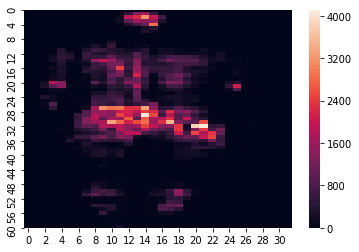

In [71]:
sas.heatmap(array_final[0].reshape(64,32))
print(avg)

In [100]:
from sklearn.cluster import KMeans as km
X = np.reshape(array_final[0],(64,32))

km = KMeans(n_clusters=4).fit(X)
km.labels_

y_km = km.predict(X)

kmeans.cluster_centers_

array([[ 0.00000000e+00,  0.00000000e+00,  8.80851322e+00,
         8.36498914e+00,  2.48884207e+01,  1.80319943e+01,
         8.29991536e+00,  7.34799482e+01,  1.69639084e+02,
         1.63082252e+02,  1.67946876e+02,  1.12385690e+02,
         6.25939966e+01,  1.11190188e+02,  5.29359256e+01,
         2.62599969e+01,  8.83212714e+01,  1.36891789e+02,
         2.08143726e+02,  8.83181246e+01,  5.96586414e+01,
         4.46742264e+01,  5.44728385e+01,  4.80428241e+01,
         3.64079810e+00,  2.20856334e+01,  0.00000000e+00,
        -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.07981476e+02,  0.00000000e+00,  0.00000000e+00,
         3.48036135e+02,  9.00830753e+02,  1.66864898e+03,
         1.77558366e+03,  2.14609714e+03,  2.36652568e+03,
         2.27789129e+03,  1.85486550e+03,  3.08635305e+03,
         1.88802256e+03,  1.22052786e+03,  2.09649025e+03,
         1.08

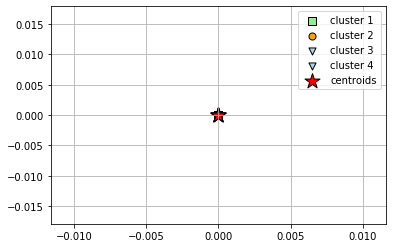

In [93]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [98]:
X.shape

(64, 32)

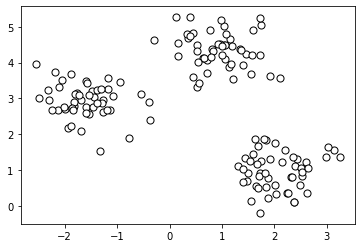

(150, 2)

In [101]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

X.shape

In [102]:
X

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,